In [1]:
#install tensorflow
%tensorflow_version 2.x
import tensorflow as tf 

In [2]:
# Upload google drive 
from google.colab import drive # acsess to drive

# load content to colab
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Improting Libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation, Flatten, Conv2D, MaxPool2D , Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras import metrics
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay

In [4]:


train_location='/content/drive/My Drive/Dataset/train/' # path for traning data
test_location='/content/drive/My Drive/Dataset/test/'   #path for testing data

In [5]:
# resize images & do Data Augmntation 
traindata = ImageDataGenerator(rescale = 1./255,
                            shear_range = 0.2,
                            zoom_range = 0.2,
                            horizontal_flip =True,
                            )

training_data = traindata.flow_from_directory( directory = train_location, target_size = (224, 224))





testdata = ImageDataGenerator(rescale = 1./255,
                            shear_range = 0.2,
                            zoom_range = 0.2,
                            horizontal_flip = True,
                            )

testing_data = testdata.flow_from_directory( directory = test_location, target_size = (224, 224))

training_data.class_indices

Found 2100 images belonging to 2 classes.
Found 900 images belonging to 2 classes.


{'COVID': 0, 'Normal': 1}

In [6]:
# define input
input_shape = (224,224,3)

# Network

# Input Layer
image_input = Input(shape = input_shape, name = 'image_input')

# Build the model

x = Conv2D(32, (3,3) , padding = 'same', activation='relu', name ='layer_1') (image_input)
x = Conv2D(64, (3,3) , padding = 'same', activation='relu', name ='layer_2') (x)
x = MaxPool2D((2,2), strides=(2,2), name ='layer_3') (x)
x =Dropout(0.25)(x)

x = Conv2D(64, (3,3) , padding = 'same', activation='relu', name ='layer_4') (x)
x = MaxPool2D((2,2), strides=(2,2), name ='layer_5') (x)
x =Dropout(0.25)(x)

x = Conv2D(128, (3,3) , padding = 'same', activation='relu', name ='layer_6') (x)
x = MaxPool2D((2,2), strides=(2,2), name ='layer_7') (x)
x =Dropout(0.25)(x)


x =Flatten(name='layer_8')(x)
x = Dense(64, name = 'layer_9')(x)
x=Dropout(0.5)(x)
x =Dense(2, activation='sigmoid', name ='predections')(x)


In [7]:
# generate the model
model = Model(inputs = image_input, outputs  =x, name = 'CNN_X_ray_COVID_19' ) 

model.summary()

Model: "CNN_X_ray_COVID_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
layer_1 (Conv2D)             (None, 224, 224, 32)      896       
_________________________________________________________________
layer_2 (Conv2D)             (None, 224, 224, 64)      18496     
_________________________________________________________________
layer_3 (MaxPooling2D)       (None, 112, 112, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 64)      0         
_________________________________________________________________
layer_4 (Conv2D)             (None, 112, 112, 64)      36928     
_________________________________________________________________
layer_5 (MaxPooling2D)       (None, 56, 56, 64) 

In [8]:
# Cmpiling the model
model.compile(optimizer = 'adam', loss = binary_crossentropy , metrics=['accuracy']) 


batch_size = 32
hist = model.fit(training_data, 
                 steps_per_epoch = training_data.samples//batch_size,
                 validation_data = testing_data,
                 validation_steps = testing_data.samples//batch_size,
                 epochs = 25
                 )

Epoch 1/25
65/65 [==============================] - 623s 9s/step - loss: 0.9357 - accuracy: 0.5256 - val_loss: 0.6871 - val_accuracy: 0.5011
Epoch 2/25
65/65 [==============================] - 35s 539ms/step - loss: 0.6644 - accuracy: 0.6286 - val_loss: 0.6708 - val_accuracy: 0.6083
Epoch 3/25
65/65 [==============================] - 35s 543ms/step - loss: 0.6185 - accuracy: 0.6509 - val_loss: 0.6150 - val_accuracy: 0.6897
Epoch 4/25
65/65 [==============================] - 35s 534ms/step - loss: 0.5874 - accuracy: 0.6900 - val_loss: 0.6493 - val_accuracy: 0.6261
Epoch 5/25
65/65 [==============================] - 35s 533ms/step - loss: 0.5752 - accuracy: 0.6987 - val_loss: 0.5794 - val_accuracy: 0.7355
Epoch 6/25
65/65 [==============================] - 34s 531ms/step - loss: 0.5395 - accuracy: 0.7205 - val_loss: 0.5299 - val_accuracy: 0.7478
Epoch 7/25
65/65 [==============================] - 34s 531ms/step - loss: 0.5092 - accuracy: 0.7597 - val_loss: 0.5662 - val_accuracy: 0.7210
E

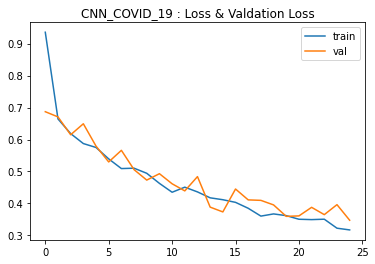

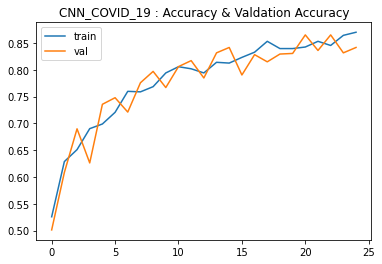

In [26]:
plt.plot(hist.history['loss'], label= 'train')
plt.plot(hist.history['val_loss'], label= 'val')
plt.title('Training Loss & Valdation Loss')
plt.legend()
plt.show()

plt.plot(hist.history['accuracy'], label = 'train')
plt.plot(hist.history['val_accuracy'], label= 'val')
plt.title(' Training Accuracy & Valdation Accuracy')
plt.legend()
plt.show()

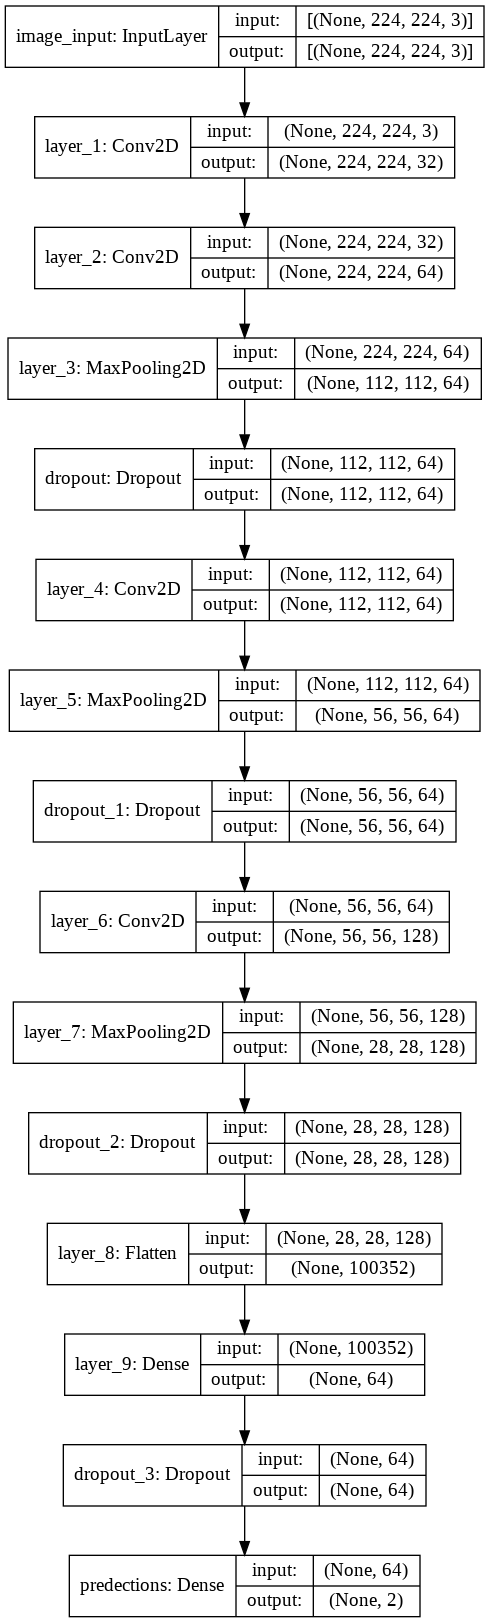

In [12]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='model.png', show_shapes=True)
Image(filename='model.png')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[268 182]
 [271 179]]
Classification_report
              precision    recall  f1-score   support

      COVID+       0.50      0.60      0.54       450
      COVID-       0.50      0.40      0.44       450

    accuracy                           0.50       900
   macro avg       0.50      0.50      0.49       900
weighted avg       0.50      0.50      0.49       900



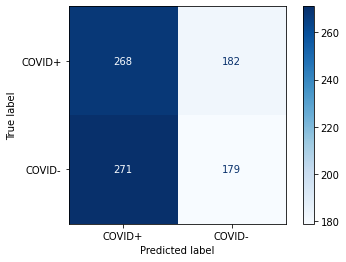

In [13]:
# Confusion Matrix & Precision & recall F1-score

target_names = ['COVID+','COVID-']
labels_names = [0,1]

Y_pred = model.predict_generator(testing_data)
y_pred = np.argmax(Y_pred, axis = 1)
cm = confusion_matrix(testing_data.classes, y_pred, labels = labels_names)

print('Confusion Matrix')
print(confusion_matrix(testing_data.classes, y_pred))

print('Classification_report')
print(classification_report(testing_data.classes, y_pred, target_names = target_names ))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = target_names)
disp = disp.plot(cmap = plt.cm.Blues, values_format = 'g')

plt.show()

In [16]:
model.evaluate(testing_data)

29/29 [==============================] - 10s 351ms/step - loss: 0.3448 - accuracy: 0.8500


[0.3448432385921478, 0.8500000238418579]

[0]
COVID+


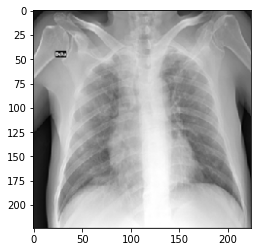

In [25]:
#example 1
from keras.preprocessing import image
image_path = "/content/drive/MyDrive/Dataset/test/COVID/COVID-1068.png"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(target_names[prediction[0]])
plt.imshow(new_img)

[1]
COVID-


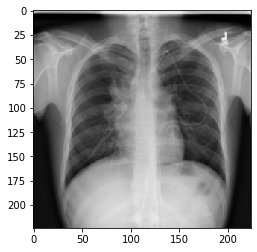

In [20]:
#example 2
image_path = "/content/drive/MyDrive/Dataset/test/Normal/Normal-10153.png"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(target_names[prediction[0]])
plt.imshow(new_img)